# Q1 : Create a scatter plot between cylinder vs Co2Emission (green color)

In [1]:
import numpy as np 
                 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:/Users/Rushi Patil/Desktop/Inside AI & ML/Machine learning/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


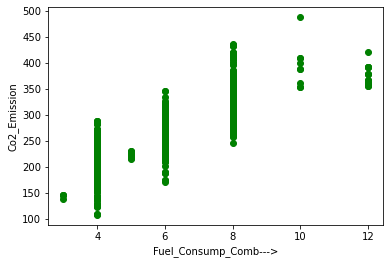

In [4]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='Green')
plt.xlabel('Fuel_Consump_Comb--->')
plt.ylabel("Co2_Emission")
plt.show()

# Q2 : using scatter plot compare data cylinder vs Co2Emission and Enginesize Vs Co2Emission using different colors

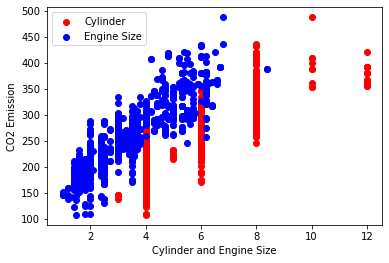

In [5]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, c="red", label="Cylinder")
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS , c="blue", label="Engine Size")


plt.xlabel("Cylinder and Engine Size")
plt.ylabel("CO2 Emission")
plt.legend()


# Q3 : using scatter plot compare data cylinder vs Co2Emission and Enginesize Vs Co2Emission and FuelConsumption_comb Co2Emission using different colors

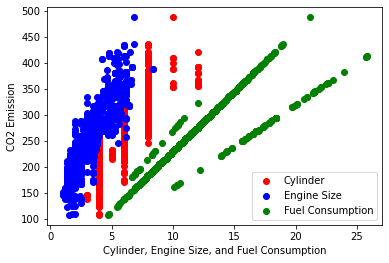

In [6]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, c="red", label="Cylinder")
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, c="blue", label="Engine Size")
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS, c="green", label="Fuel Consumption")


plt.xlabel("Cylinder, Engine Size, and Fuel Consumption")
plt.ylabel("CO2 Emission")
plt.legend()


plt.show()

# Q4 : train your model with indepedent variable as cylinder and dependent variable as Co2Emission

In [7]:
cdf1 = df[['CYLINDERS','CO2EMISSIONS']] 

In [8]:
cdf1

,CYLINDERS,CO2EMISSIONS
0,4,196
1,4,221
2,4,136
3,6,255
4,6,244
...,...,...
1062,6,271
1063,6,264
1064,6,271
1065,6,260


In [9]:
msk = np.random.rand(len(cdf1))  <= 0.80

In [10]:
msk  

array([ True,  True,  True, ...,  True,  True,  True])

In [11]:
train = cdf1[msk]

In [12]:
test = cdf1[~msk]


In [13]:
train.shape

(845, 2)

In [14]:
test.shape

(222, 2)

In [15]:
train[['CYLINDERS']]

,CYLINDERS
0,4
1,4
2,4
3,6
4,6
...,...
1061,6
1063,6
1064,6
1065,6


In [16]:
from sklearn import linear_model

In [17]:
regr = linear_model.LinearRegression()

In [18]:
train_x = np.asanyarray(train[['CYLINDERS']])          
train_y = np.asanyarray(train[['CO2EMISSIONS']])       

In [19]:
regr.fit(train_x, train_y)

LinearRegression()

In [20]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[28.9900634]]
Intercept:  [87.55835334]


In [21]:
regr.coef_[0][0]

28.99006340107182

In [22]:
regr.intercept_[0]

87.5583533419352

Text(0, 0.5, 'Co2_Emission')

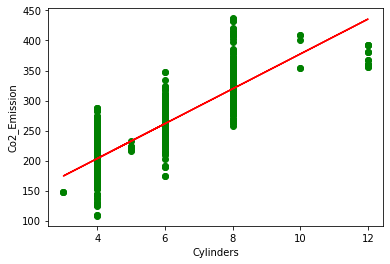

In [23]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='Green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'red') 
plt.xlabel("Cylinders")
plt.ylabel("Co2_Emission")

In [24]:
test_x = np.asanyarray(test[['CYLINDERS']]) 
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [25]:
predicted_y = regr.predict(test_x) 

In [26]:
from sklearn.metrics import r2_score 

In [27]:
print(f"Mean absolute error: {np.mean(np.absolute(predicted_y - test_y))} ")

Mean absolute error: 23.63820072215995 


In [28]:
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) **2))

Residual sum of squares (MSE): 1024.25


In [29]:
print(f"R2-score:{r2_score(test_y , predicted_y)}") 

R2-score:0.7616753582471131


In [30]:
print(f"R2-score:{r2_score(test_y , predicted_y )*100 :.2f}") 

R2-score:76.17


In [31]:
regr.predict([[8.8]])

array([[342.67091127]])

In [32]:
regr.predict([[13]])

array([[464.42917756]])

# Q5 : Train another model with independent variable as FuelConsumption_comb and dependent variable as Co2Emission

In [33]:
cdf2 = df[['FUELCONSUMPTION_COMB','CO2EMISSIONS']] 

In [34]:
cdf2

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,8.5,196
1,9.6,221
2,5.9,136
3,11.1,255
4,10.6,244
...,...,...
1062,11.8,271
1063,11.5,264
1064,11.8,271
1065,11.3,260


In [35]:
msk = np.random.rand(len(cdf2))  <= 0.80

In [36]:
train = cdf2[msk]

In [37]:
test = cdf2[~msk]

In [38]:
train.shape

(852, 2)

In [39]:
test.shape

(215, 2)

In [40]:
from sklearn import linear_model

In [41]:
regr = linear_model.LinearRegression()

In [42]:
regr

LinearRegression()

In [43]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])          
train_y = np.asanyarray(train[['CO2EMISSIONS']])       

In [44]:
regr.fit(train_x, train_y)

LinearRegression()

In [45]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.54737229]]
Intercept:  [65.28835656]


In [46]:
regr.coef_[0][0]

16.54737229106671

In [47]:
regr.intercept_[0]

65.28835655762344

Text(0, 0.5, 'Co2_Emission')

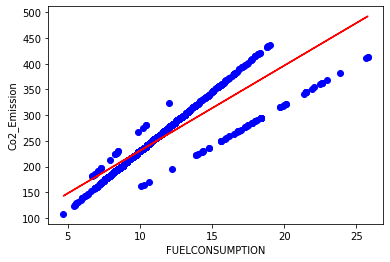

In [48]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='Blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'red') 
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("Co2_Emission")

In [49]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']]) 
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [50]:
test_x.shape


(215, 1)

In [51]:
test_y.shape

(215, 1)

In [52]:
predicted_y = regr.predict(test_x) 

In [53]:
from sklearn.metrics import r2_score 

In [54]:
print(f"R2-score:{r2_score(test_y , predicted_y)}") 

R2-score:0.7603353630460093


In [55]:
print(f"R2-score:{r2_score(test_y , predicted_y)*100:.2f} %")

R2-score:76.03 %


In [56]:
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) **2))

Residual sum of squares (MSE): 960.95


In [57]:
regr.predict([[8.1]])

array([[199.32207212]])

In [58]:
regr.predict([[12.1]])

array([[265.51156128]])

# Q6 : Train your model on different train test ratio and train the models and note down there accuracies

In [59]:
cdf2

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,8.5,196
1,9.6,221
2,5.9,136
3,11.1,255
4,10.6,244
...,...,...
1062,11.8,271
1063,11.5,264
1064,11.8,271
1065,11.3,260


In [60]:
# now we training  data on 80 :20 

In [61]:
X = cdf2[["FUELCONSUMPTION_COMB"]].values 
y = cdf2[["CO2EMISSIONS"]].values 
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size= 0.20, random_state= 40)

from sklearn import linear_model
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train2)

print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

predicted_y2 = regr2.predict(X_test2) 

from sklearn.metrics import r2_score 

print(f"R2-score:{r2_score(y_test2 , predicted_y2)*100:.2f} %")

trained_data80_20 = (f"R2-score:{r2_score(y_test2 , predicted_y2)*100:.2f} %")

Coefficients:  [[16.02612838]]
Intercept:  [69.67459833]
R2-score:81.25 %


In [62]:
trained_data80_20

'R2-score:81.25 %'

In [63]:
# Now training data 90 : 10


In [64]:
X = cdf2[["FUELCONSUMPTION_COMB"]].values 
y = cdf2[["CO2EMISSIONS"]].values 
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size= 0.10, random_state= 30)

from sklearn import linear_model
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train2)

print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

predicted_y2 = regr2.predict(X_test2) 

from sklearn.metrics import r2_score 

print(f"R2-score:{r2_score(y_test2 , predicted_y2)*100:.2f} %")

trained_data90_10 = (f"R2-score:{r2_score(y_test2 , predicted_y2)*100:.2f} %")

Coefficients:  [[16.28426032]]
Intercept:  [67.73403214]
R2-score:78.35 %


In [65]:
trained_data90_10

'R2-score:78.35 %'

In [66]:
# # Now training data 70 : 30

In [67]:
X = cdf2[["FUELCONSUMPTION_COMB"]].values  # Independennt variables
y = cdf2[["CO2EMISSIONS"]].values # Labels/ Dependent Variables
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size= 0.30, random_state= 40)

from sklearn import linear_model
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train2)

print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

predicted_y2 = regr2.predict(X_test2) 

from sklearn.metrics import r2_score 

print(f"R2-score:{r2_score(y_test2 , predicted_y2)*100:.2f} %")

trained_data70_30 = (f"R2-score:{r2_score(y_test2 , predicted_y2)*100:.2f} %")

Coefficients:  [[16.30327134]]
Intercept:  [67.07669754]
R2-score:79.10 %


In [68]:
trained_data70_30 

'R2-score:79.10 %'

In [69]:
print(F"""Accuracy when spit data in 80:20 is {trained_data80_20},
Accuracy when spit data in 90:10 is {trained_data90_10},
Accuracy when spit data in 70:30 is {trained_data70_30} """)

Accuracy when spit data in 80:20 is R2-score:81.25 %,
Accuracy when spit data in 90:10 is R2-score:78.35 %,
Accuracy when spit data in 70:30 is R2-score:79.10 % 


# Q7 : we are providing you another dataset regarding housing prediction to need to apply Linear Regression on atleast 5 pairs of independent and dependent variable and store their accuracy and then make a plot of those accuracy

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [71]:
df = pd.read_csv("C:/Users/Rushi Patil/Desktop/Data sets/houseRegressionStudents.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [72]:
df1 = df.drop('SalePrice',axis = 1)   

In [73]:
df1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [74]:
DV = df['SalePrice'].values 

In [75]:
DV

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [76]:
df1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [78]:
#Removing Object Data Type

In [79]:
data = df1.select_dtypes(include=['int64'])

In [80]:
data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,240,366,0,112,0,0,0,0,4,2010


In [81]:
#Now left with 34 columns

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [83]:
data.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [84]:
# Data Has no null values

In [85]:
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [86]:
new_data2 = data.drop('Id',axis = 1)   

In [87]:
new_data2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [88]:
# applying MIR

In [89]:
Sample_IV = new_data2.values

In [90]:
from sklearn.feature_selection import mutual_info_regression

In [91]:
MIR = mutual_info_regression(Sample_IV,DV)

In [92]:
MIR

array([0.05571027, 0.09795734, 0.53102652, 0.12753393, 0.27813911,
       0.20972406, 0.12621761, 0.        , 0.06785281, 0.25969672,
       0.24216979, 0.09950649, 0.        , 0.35729744, 0.02705141,
       0.02093316, 0.23811913, 0.08037059, 0.07180564, 0.02979567,
       0.18252901, 0.16848519, 0.36851485, 0.28308734, 0.056634  ,
       0.06237802, 0.02690425, 0.        , 0.01078823, 0.00748279,
       0.00296849, 0.        , 0.00463542])

In [93]:
MIR_Ser = pd.Series(MIR)

In [94]:
    MIR_Ser

0     0.055710
1     0.097957
2     0.531027
3     0.127534
4     0.278139
5     0.209724
6     0.126218
7     0.000000
8     0.067853
9     0.259697
10    0.242170
11    0.099506
12    0.000000
13    0.357297
14    0.027051
15    0.020933
16    0.238119
17    0.080371
18    0.071806
19    0.029796
20    0.182529
21    0.168485
22    0.368515
23    0.283087
24    0.056634
25    0.062378
26    0.026904
27    0.000000
28    0.010788
29    0.007483
30    0.002968
31    0.000000
32    0.004635
dtype: float64

In [95]:
ivnames = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [96]:
MIR_Ser.index = ivnames

In [97]:
MIR_Ser

MSSubClass       0.055710
LotArea          0.097957
OverallQual      0.531027
OverallCond      0.127534
YearBuilt        0.278139
YearRemodAdd     0.209724
BsmtFinSF1       0.126218
BsmtFinSF2       0.000000
BsmtUnfSF        0.067853
TotalBsmtSF      0.259697
1stFlrSF         0.242170
2ndFlrSF         0.099506
LowQualFinSF     0.000000
GrLivArea        0.357297
BsmtFullBath     0.027051
BsmtHalfBath     0.020933
FullBath         0.238119
HalfBath         0.080371
BedroomAbvGr     0.071806
KitchenAbvGr     0.029796
TotRmsAbvGrd     0.182529
Fireplaces       0.168485
GarageCars       0.368515
GarageArea       0.283087
WoodDeckSF       0.056634
OpenPorchSF      0.062378
EnclosedPorch    0.026904
3SsnPorch        0.000000
ScreenPorch      0.010788
PoolArea         0.007483
MiscVal          0.002968
MoSold           0.000000
YrSold           0.004635
dtype: float64

In [98]:
remove_data1 = MIR_Ser.sort_values(ascending=False)

In [99]:
remove_data1

OverallQual      0.531027
GarageCars       0.368515
GrLivArea        0.357297
GarageArea       0.283087
YearBuilt        0.278139
TotalBsmtSF      0.259697
1stFlrSF         0.242170
FullBath         0.238119
YearRemodAdd     0.209724
TotRmsAbvGrd     0.182529
Fireplaces       0.168485
OverallCond      0.127534
BsmtFinSF1       0.126218
2ndFlrSF         0.099506
LotArea          0.097957
HalfBath         0.080371
BedroomAbvGr     0.071806
BsmtUnfSF        0.067853
OpenPorchSF      0.062378
WoodDeckSF       0.056634
MSSubClass       0.055710
KitchenAbvGr     0.029796
BsmtFullBath     0.027051
EnclosedPorch    0.026904
BsmtHalfBath     0.020933
ScreenPorch      0.010788
PoolArea         0.007483
YrSold           0.004635
MiscVal          0.002968
LowQualFinSF     0.000000
BsmtFinSF2       0.000000
3SsnPorch        0.000000
MoSold           0.000000
dtype: float64

In [100]:
top_5 = MIR_Ser.nlargest(5)

In [101]:
top_5

OverallQual    0.531027
GarageCars     0.368515
GrLivArea      0.357297
GarageArea     0.283087
YearBuilt      0.278139
dtype: float64

In [102]:
first_col = top_5.index

In [103]:
type(first_col)

pandas.core.indexes.base.Index

In [104]:
first_col_list = first_col.tolist()

In [105]:
first_col_list

['OverallQual', 'GarageCars', 'GrLivArea', 'GarageArea', 'YearBuilt']

In [106]:
IV = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt']]

In [107]:
IV

,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt
0,7,1710,2,548,2003
1,6,1262,2,460,1976
2,7,1786,2,608,2001
3,7,1717,3,642,1915
4,8,2198,3,836,2000
...,...,...,...,...,...
1455,6,1647,2,460,1999
1456,6,2073,2,500,1978
1457,7,2340,1,252,1941
1458,5,1078,1,240,1950


In [108]:
# 1st pair  OverallQual and SalePrice

In [109]:
IV1 = IV[["OverallQual"]].values 

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(IV1, DV, test_size= 0.20, random_state= 50)

from sklearn import linear_model
regr1= linear_model.LinearRegression()
regr1.fit(X_train1, y_train1)

print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

predicted_y1 = regr1.predict(X_test1) 

from sklearn.metrics import r2_score 

print(f"R2-score:{r2_score(y_test1 , predicted_y1)*100:.2f} %")

OverallQual_as_iv = float(f"{r2_score(y_test1 , predicted_y1)*100:.2f}")

Coefficients:  [45042.34669305]
Intercept:  -93948.65538918899
R2-score:68.72 %


Text(0, 0.5, 'Sale price')

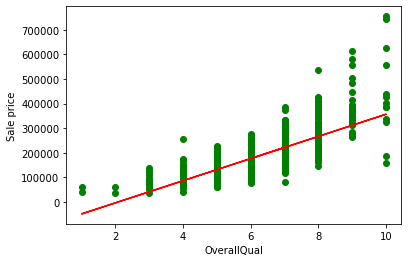

In [110]:
plt.scatter(X_train1,y_train1,  color='Green')
plt.plot(X_train1, regr1.coef_[0]*X_train1 + regr1.intercept_, 'red') 
plt.xlabel("OverallQual")
plt.ylabel("Sale price")

In [111]:
#2nd pair GrLivArea and SalePrice¶

In [112]:
IV2 = IV[["GrLivArea"]].values 

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(IV2, DV, test_size= 0.20, random_state= 50)

from sklearn import linear_model
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train2)

print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

predicted_y2 = regr2.predict(X_test2) 

from sklearn.metrics import r2_score 

print(f"R2-score:{r2_score(y_test2 , predicted_y2)*100:.2f} %")

GrLivArea_as_iv = float(f"{r2_score(y_test2 , predicted_y2)*100:.2f} ")


Coefficients:  [103.8024331]
Intercept:  23615.355044686585
R2-score:55.21 %


Text(0, 0.5, 'Sale price')

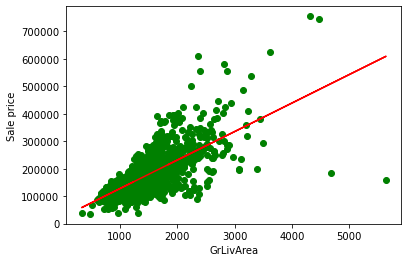

In [113]:
plt.scatter(X_train2,y_train2,  color='Green')
plt.plot(X_train2, regr2.coef_[0]*X_train2 + regr2.intercept_, 'red') 
plt.xlabel("GrLivArea")
plt.ylabel("Sale price")

In [114]:
IV3 = IV[["GarageCars"]].values 

from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(IV3, DV, test_size= 0.20, random_state= 50)

from sklearn import linear_model
regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train3)

print ('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

predicted_y3 = regr3.predict(X_test3) 

from sklearn.metrics import r2_score 

print(f"R2-score:{r2_score(y_test3 , predicted_y3)*100:.2f} %")

GarageCars_as_iv = float(f"{r2_score(y_test3 , predicted_y3)*100:.2f}")


Coefficients:  [67401.35858239]
Intercept:  61460.61456352682
R2-score:44.01 %


Text(0, 0.5, 'Sale price')

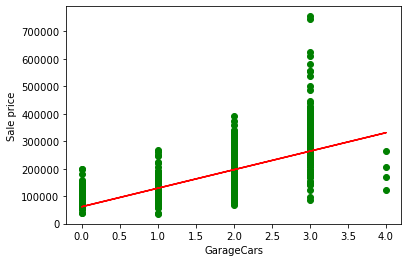

In [115]:
plt.scatter(X_train3,y_train3,  color='Green')
plt.plot(X_train3, regr3.coef_[0]*X_train3 + regr3.intercept_, 'red') 
plt.xlabel("GarageCars")
plt.ylabel("Sale price")

In [116]:
#4th pair GarageArea and SalePrice

In [117]:
IV4 = IV[["GarageArea"]].values 

from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(IV4, DV, test_size= 0.20, random_state= 50)

from sklearn import linear_model
regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train4)

print ('Coefficients: ', regr4.coef_)
print ('Intercept: ',regr4.intercept_)

predicted_y4 = regr4.predict(X_test4) 

from sklearn.metrics import r2_score 

print(f"R2-score:{r2_score(y_test4 , predicted_y4)*100:.2f} %")

GarageArea_as_iv = float(f"{r2_score(y_test4, predicted_y4)*100:.2f} ")


Coefficients:  [230.73379419]
Intercept:  71852.06824439224
R2-score:39.82 %


Text(0, 0.5, 'Sale price')

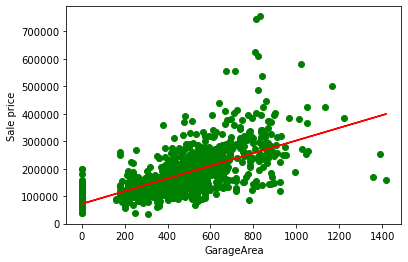

In [118]:
plt.scatter(X_train4,y_train4,  color='Green')
plt.plot(X_train4, regr4.coef_[0]*X_train4 + regr4.intercept_, 'red') 
plt.xlabel("GarageArea")
plt.ylabel("Sale price")

In [119]:
#5th pair YearBuilt and SalePrice

In [120]:
IV5 = IV[["YearBuilt"]].values 

from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(IV5, DV, test_size= 0.20, random_state= 50)

from sklearn import linear_model
regr5 = linear_model.LinearRegression()
regr5.fit(X_train5, y_train5)

print ('Coefficients: ', regr5.coef_)
print ('Intercept: ',regr5.intercept_)

predicted_y5 = regr5.predict(X_test5) 

from sklearn.metrics import r2_score 

print(f"R2-score:{r2_score(y_test5 , predicted_y5)*100:.2f} %")

YearBuilt_as_iv = float(f"{r2_score(y_test5 , predicted_y5)*100:.2f}")


Coefficients:  [1365.51372819]
Intercept:  -2510960.8837798163
R2-score:26.58 %


Text(0, 0.5, 'Sale price')

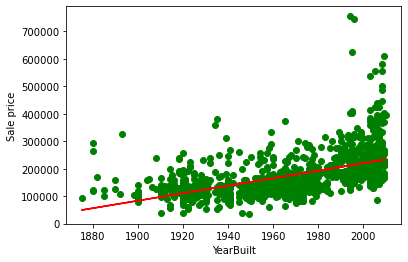

In [121]:
plt.scatter(X_train5,y_train5,  color='Green')
plt.plot(X_train5, regr5.coef_[0]*X_train5 + regr5.intercept_, 'red') 
plt.xlabel("YearBuilt")
plt.ylabel("Sale price")

In [122]:
print(f"OverallQual_as_iv= {OverallQual_as_iv}\nGrLivArea_as_iv {GrLivArea_as_iv}\nGarageCars_as_iv= {GarageCars_as_iv}\nGarageArea_as_iv= {GarageArea_as_iv}\nYearBuilt= {YearBuilt_as_iv}")


OverallQual_as_iv= 68.72
GrLivArea_as_iv 55.21
GarageCars_as_iv= 44.01
GarageArea_as_iv= 39.82
YearBuilt= 26.58


In [128]:
top5_acc = [OverallQual_as_iv, GrLivArea_as_iv, GarageCars_as_iv, GarageArea_as_iv, YearBuilt_as_iv ]


In [129]:
top5_cl = [ 'OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt']

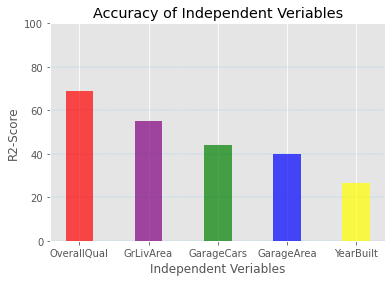

In [130]:
# creating the bar plot

plt.style.use("ggplot")

plt.bar(top5_cl,top5_acc, color =['red', 'purple', 'green', 'blue', 'Yellow'] , alpha = 0.7,  width = 0.4)
plt.xlabel("Independent Veriables")
plt.ylabel("R2-Score")
plt.title("Accuracy of Independent Veriables")
plt.grid(axis = 'y', color = 'skyblue', linestyle = '--', linewidth = 0.4)
plt.ylim(0, 100)  

plt.show()
